<br><br>

## Exercício clusterização: clusters RFM

<br>

No exercício a seguir, estudaremos um conceito muito interessante e comum no contexto de dados, os __clusters RFM!__

A sigla __RFM__ vem do inglês, significando __recency, frequency and monetary.__ Em português, recência, frequência e valor monetário.

Essa clusterização é muito comum quando o __objetivo é segmentar clientes de uma certa base__ em termos de:

<br>

__Recência__ de compra: há quantos dias foi feita a última compra, relativo a data atual;

__Freqûencia__ de compra: considerando uma certa janela de tempo, qual a frequência (ou quantidade) de compra;

__Valor monetário__ das compras: qual foi o total gasto, nesta mesma janela de tempo.


<br>

Use a função getData para carregar os dados disponíveis para este exercício.

Esse dataset contém 4 colunas, em que cada linha/istância corresponde a um cliente único de uma certa empresa.

As colunas "rec", "freq" e "valor" indicam a recência, frequência e valor monetário do cliente num período de 120 dias.

Desta forma, por exemplo, um usuário com:

    - recência: 30
    
    - frequência: 5
    
    - valor: 10
    
deve ser interpretado como: um usuário que fez a última compra há 30 dias atrás; que a frequência mensal de compra dele, dentro dos últimos 120 dias foi de 5 vezes; o valor médio gasto, dentro desse período de 120 dias, foi de R$10,00.

<br>

__Exercício:__

Como cientista de dados da empresa, o seu __objetivo__ é __analisar os dados disponíveis__ e procurar pelos __grupos de clientes mais valiosos e menos valiosos__ para a companhia. 

Justifique bastante suas análises e __interprete os resultados.__

Você pode (e deve!) utilizar técnicas de clusterização, como __KMeans__ e __DBSCAN__, bem como criar segmentações a partir de suas __análises exploratórias.__

Lembre-se que, neste contexto não supervisionado, não existe resposta certa e a __criatividade__ é fundamental!

__Obs.:__ Ao utilizar o KMeans e o DBSCAN, lembre-se de normalizar os dados antes de aplicar os algoritmos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import plotly.offline as pyoff
import plotly.graph_objs as go

import datetime as dt
import feature_engine

from feature_engine.outliers import Winsorizer

import warnings
warnings.filterwarnings("ignore")
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)


def getData():
    return pd.read_csv("dataframe_exercicio_clusterizacao_RFM.csv")

In [2]:
df = getData()
df

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067
...,...,...,...,...
1007,1008,50.0,6.0,116.867455
1008,1009,72.0,4.0,94.807854
1009,1010,50.0,5.0,99.187523
1010,1011,81.0,2.0,66.581900


In [3]:
df

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067
...,...,...,...,...
1007,1008,50.0,6.0,116.867455
1008,1009,72.0,4.0,94.807854
1009,1010,50.0,5.0,99.187523
1010,1011,81.0,2.0,66.581900


In [4]:
def summary(df, pred=None):
  obs = df.shape[0]
  types = df.dtypes
  counts = df.apply(lambda x: x.count())
  min = df.min()
  uniques = df.apply(lambda x: x.unique().shape[0])
  nulls = df.apply(lambda x: x.isnull().sum())
  print('Data shape:', df.shape)

  if pred is None:
        cols = ['types', 'counts', 'uniques', 'nulls', 'min']
        str = pd.concat([types, counts, uniques, nulls, min], axis = 1, sort=True)

  str.columns = cols
  dtypes = str.types.value_counts()
  print('___________________________\nData types:')
  print(str.types.value_counts())
  print('___________________________')
  return str

details = summary(df)
display(details.sort_values(by='nulls', ascending=False))

Data shape: (1012, 4)
___________________________
Data types:
float64    3
int64      1
Name: types, dtype: int64
___________________________


,types,counts,uniques,nulls,min
freq,float64,1012,14,0,1.00000
rec,float64,1012,92,0,1.00000
user,int64,1012,1012,0,1.00000
valor,float64,1012,1012,0,10.85915


In [5]:
df.describe()

,user,rec,freq,valor
count,1012.000000,1012.000000,1012.000000,1012.000000
mean,506.500000,45.064229,4.524704,109.568915
std,292.283538,26.471133,2.423586,125.013542
min,1.000000,1.000000,1.000000,10.859150
25%,253.750000,23.000000,2.000000,57.097928
50%,506.500000,45.000000,5.000000,103.561817
75%,759.250000,68.000000,7.000000,152.704398
max,1012.000000,118.000000,17.000000,3241.824119


In [6]:
df

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067
...,...,...,...,...
1007,1008,50.0,6.0,116.867455
1008,1009,72.0,4.0,94.807854
1009,1010,50.0,5.0,99.187523
1010,1011,81.0,2.0,66.581900


In [7]:
df.columns = ['user', 'Recency', 'Frequency', 'Monetary']

In [8]:
df

,user,Recency,Frequency,Monetary
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067
...,...,...,...,...
1007,1008,50.0,6.0,116.867455
1008,1009,72.0,4.0,94.807854
1009,1010,50.0,5.0,99.187523
1010,1011,81.0,2.0,66.581900


**Agora dividimos as métricas em segmentos usando quantis. Atribuiremos uma pontuação de 1 a 4 para cada Recência, Frequência e Monetária, respectivamente. 1 é o valor mais alto e 4 é o valor mais baixo. Uma pontuação final de RFM (Valor Geral) é calculada simplesmente combinando números de pontuação RFM individuais.**

In [9]:
quantiles = df.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [10]:
segmented_rfm = df.copy()

In [11]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [12]:
segmented_rfm['R_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Monetary',quantiles))
segmented_rfm.head()

,user,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,1,15.0,7.0,196.881015,1,2,1
1,2,51.0,6.0,162.408892,3,2,1
2,3,80.0,5.0,180.158644,4,3,1
3,4,38.0,4.0,156.048130,2,3,1
4,5,19.0,6.0,164.052067,1,2,1


**Calculando a pontuação total RFM combinada**

RFM_Score = R_quartile + F_quartile + M_quartile


In [13]:
segmented_rfm['RFM_Segment'] = segmented_rfm.R_quartile.map(str)+segmented_rfm.F_quartile.map(str)+segmented_rfm.M_quartile.map(str)

In [14]:
segmented_rfm.head()

,user,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment
0,1,15.0,7.0,196.881015,1,2,1,121
1,2,51.0,6.0,162.408892,3,2,1,321
2,3,80.0,5.0,180.158644,4,3,1,431
3,4,38.0,4.0,156.048130,2,3,1,231
4,5,19.0,6.0,164.052067,1,2,1,121


In [15]:
segmented_rfm['RFM_Score'] = segmented_rfm[['R_quartile','F_quartile','M_quartile']].sum(axis=1)

In [16]:
segmented_rfm.head()

,user,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_Segment,RFM_Score
0,1,15.0,7.0,196.881015,1,2,1,121,4
1,2,51.0,6.0,162.408892,3,2,1,321,6
2,3,80.0,5.0,180.158644,4,3,1,431,8
3,4,38.0,4.0,156.048130,2,3,1,231,6
4,5,19.0,6.0,164.052067,1,2,1,121,4


In [17]:
print("Melhores clientes: ",len(segmented_rfm[segmented_rfm['RFM_Segment']=='111']))
print('Clientes fieis: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Grandes gastadores: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Quase perdido: ', len(segmented_rfm[segmented_rfm['RFM_Segment']=='134']))
print('Clientes perdidos: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='344']))
print('Perdeu clientes baratos: ',len(segmented_rfm[segmented_rfm['RFM_Segment']=='444']))

Melhores clientes:  16
Clientes fieis:  130
Grandes gastadores:  253
Quase perdido:  23
Clientes perdidos:  17
Perdeu clientes baratos:  14


In [18]:
segmented_rfm['RFM_Score'].unique()

array([ 4,  6,  8, 11,  9,  7,  5, 10,  3, 12], dtype=int64)

In [19]:
segmented_rfm.groupby('RFM_Score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3             7.2      10.2    216.9    16
4            21.4       7.5    163.3    24
5            22.2       6.3    149.9    61
6            28.1       5.5    130.3   141
7            36.6       4.6    119.0   203
8            47.9       4.5    100.4   220
9            56.3       3.6    109.3   191
10           67.7       3.4     68.2    92
11           72.3       2.7     40.9    50
12           79.7       1.6     39.2    14

**K-means para realizar a segmentação de clientes RFM (Recência, Frequência e Monetária).**

K-means dá o melhor resultado nas seguintes condições:

    -A distribuição dos dados não é distorcida (ou seja, distribuição de cauda longa)
    -Os dados são padronizados (ou seja, média de 0 e desvio padrão de 1).
Traçar gráficos de distribuição para verificar a assimetria.

In [20]:
## Função para verificar a assimetria
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

Recency's: Skew: 0.0069920855200154095, : SkewtestResult(statistic=0.09146763220617093, pvalue=0.9271210241546768)
Frequency's: Skew: 0.29705362391665224, : SkewtestResult(statistic=3.806665783791062, pvalue=0.00014085288591344713)
Monetary's: Skew: 17.914997885479952, : SkewtestResult(statistic=40.72572489020679, pvalue=0.0)


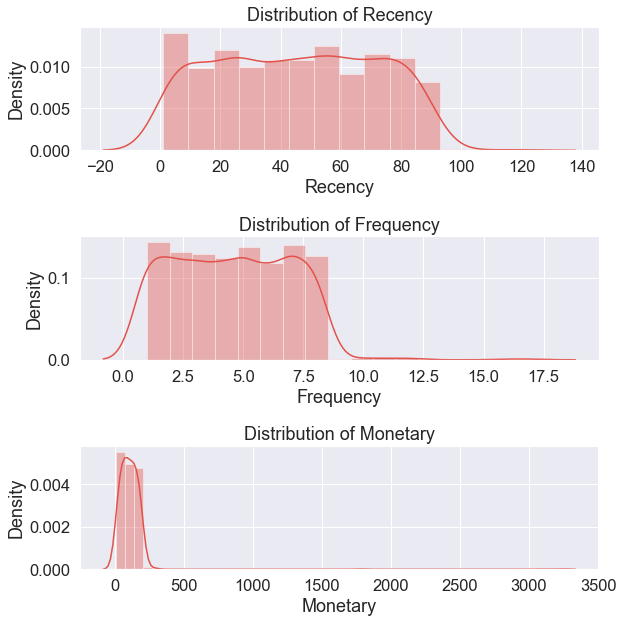

In [21]:
# Trace todos os 3 gráficos juntos para conclusões resumidas
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df,'Recency')

plt.subplot(3, 1, 2)
check_skew(df,'Frequency')

plt.subplot(3, 1, 3)
check_skew(df,'Monetary')

plt.tight_layout()

Os dados são altamente assimétricos, portanto, realizaremos transformações de log para reduzir a assimetria de cada variável. Eu adicionei uma pequena constante, pois a transformação de log exige que todos os valores sejam positivos.

In [22]:
df_rfm_log = df.copy()

In [23]:
df_rfm_log.head()

,user,Recency,Frequency,Monetary
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067


Recency's: Skew: -1.3047606114789518, : SkewtestResult(statistic=-13.376324244320529, pvalue=8.315931526217631e-41)
Frequency's: Skew: -0.5002922947925322, : SkewtestResult(statistic=-6.198695915415276, pvalue=5.693290625995748e-10)
Monetary's: Skew: -0.6575691172379419, : SkewtestResult(statistic=-7.883204099940829, pvalue=3.190912290764824e-15)


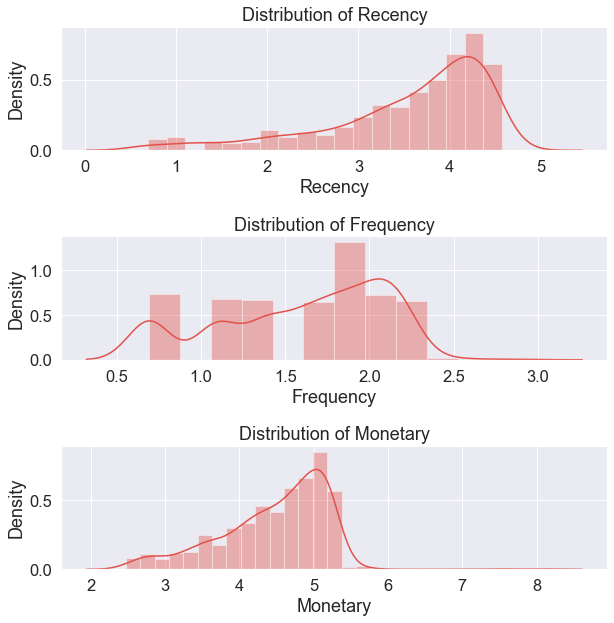

In [24]:
df_rfm_log = np.log(df_rfm_log+1)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')
plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout()

In [25]:
windsoriser = Winsorizer(tail='both',
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [26]:
df_rfm_log = windsoriser.transform(df_rfm_log)

Uma vez que a assimetria é reduzida, eu padronizo os dados centralizando e dimensionando. Observe que todas as variáveis agora têm uma média de 0 e um desvio padrão de 1.

In [27]:
scaler = StandardScaler()

scaler.fit(df_rfm_log)

RFM_Table_scaled = scaler.transform(df_rfm_log)

In [28]:
RFM_Table_scaled = pd.DataFrame(RFM_Table_scaled, columns=df_rfm_log.columns)
RFM_Table_scaled.head()

,user,Recency,Frequency,Monetary
0,-5.411826,-1.006270,0.972944,1.217543
1,-4.992882,0.454062,0.703836,0.926755
2,-4.695636,1.003185,0.393175,1.083410
3,-4.465074,0.097629,0.025740,0.866438
4,-4.276691,-0.729799,0.703836,0.941955


# **Clusterização K-Means**

Encontrar o número ideal de clusters

In [29]:
from scipy.spatial.distance import cdist
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Construindo e ajustando o modelo 
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Table_scaled) 
    kmeanModel.fit(RFM_Table_scaled)     
      
    distortions.append(sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / RFM_Table_scaled.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(RFM_Table_scaled, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / RFM_Table_scaled.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

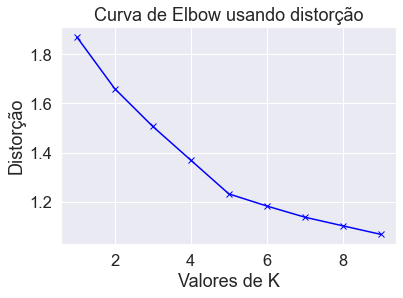

In [30]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Valores de K') 
plt.ylabel('Distorção') 
plt.title('Curva de Elbow usando distorção') 
plt.show() 

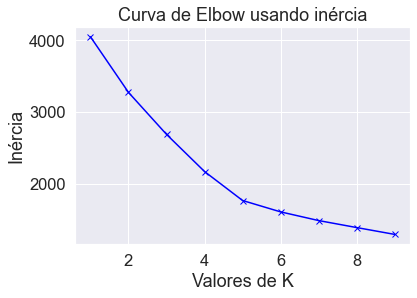

In [31]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Valores de K') 
plt.ylabel('Inércia') 
plt.title('Curva de Elbow usando inércia') 
plt.show() 

O valor do cluster em que essa diminuição no valor da inércia se torna constante pode ser escolhido como o valor do cluster correto para nossos dados. Olhando para a curva de cotovelo acima, podemos escolher qualquer número de clusters entre 4 e 7.

In [32]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extrair rótulos de cluster
    cluster_labels = kmeans.labels_
        
    # Criar uma coluna de rótulo de cluster no conjunto de dados original
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Inicializar TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # plotar t-SNE
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

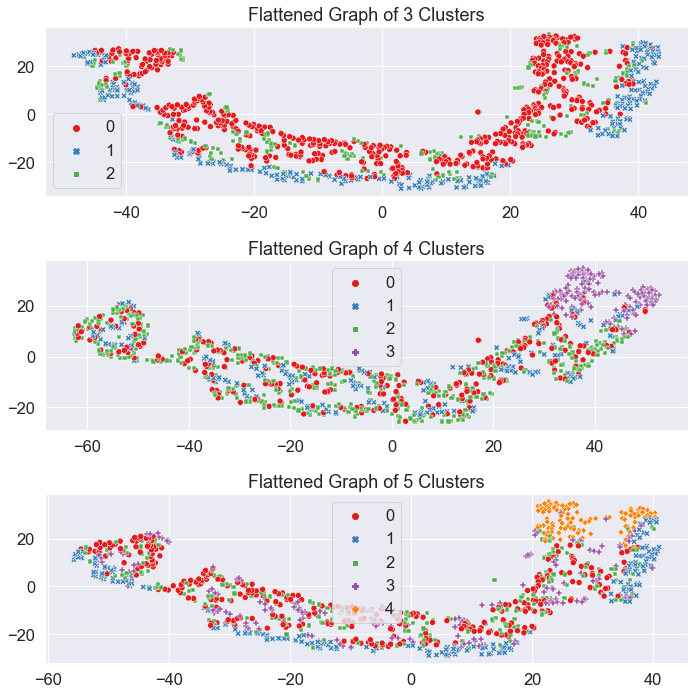

In [33]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(RFM_Table_scaled, 3, df)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(RFM_Table_scaled, 4, df)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(RFM_Table_scaled, 5, df)

plt.tight_layout()

In [34]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df.index, 
                                       columns=df.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['user', 'Cluster'],
                        value_vars=['Recency', 'Frequency', 'Monetary'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

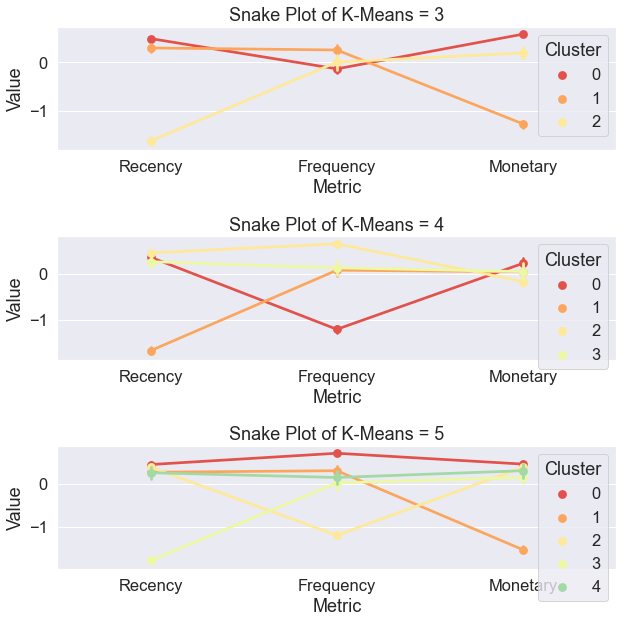

In [35]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(RFM_Table_scaled, df_rfm_k3, df)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(RFM_Table_scaled, df_rfm_k4, df)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(RFM_Table_scaled, df_rfm_k5, df)

plt.tight_layout()

A partir dos gráficos achatados e dos gráficos de cobra, é evidente que ter um valor de cluster de 4, segmenta bem nossos clientes. Também poderíamos optar por um número maior de clusters, depende completamente de como a empresa deseja segmentar seus clientes.

Interpretação dos clusters formados usando k-means .

In [36]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'Monetary': ['mean', 'count']
    }).round(0)
    
    return df_new

In [37]:
rfm_values(df_rfm_k3)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          57.0       4.0    144.0   528
1          50.0       5.0     40.0   274
2           9.0       5.0    115.0   210

In [38]:
rfm_values(df_rfm_k4)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          53.0       2.0    134.0   256
1           9.0       5.0    109.0   192
2          55.0       6.0     96.0   426
3          51.0       5.0    110.0   138

In [39]:
rfm_values(df_rfm_k5)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          55.0       6.0    125.0   302
1          50.0       5.0     32.0   186
2          53.0       2.0    142.0   239
3           8.0       5.0    113.0   169
4          50.0       5.0    122.0   116

In [40]:
RFM_Table_scaled.head()

,user,Recency,Frequency,Monetary
0,-5.411826,-1.006270,0.972944,1.217543
1,-4.992882,0.454062,0.703836,0.926755
2,-4.695636,1.003185,0.393175,1.083410
3,-4.465074,0.097629,0.025740,0.866438
4,-4.276691,-0.729799,0.703836,0.941955


O que cada cluster representa?

O primeiro cluster pertence ao segmento "Melhores Clientes" que vimos anteriormente, pois eles compram recentemente (R = 1), compradores frequentes (F = 1) e gastaram mais (M = 1).
Os clientes do segundo cluster podem ser interpretados como clientes transeuntes, pois sua última compra foi há muito tempo (R=4), compraram muito pouco (F=4) e gastaram pouco (M=4). torná-los membros permanentes.
O terceiro cluster está mais relacionado ao segmento "Quase Perdido", pois não compram há algum tempo (R=3), mas costumavam comprar com frequência e gastaram muito.
O último cluster são Clientes muito Fiéis e também gastaram muito.

Podemos verificar que a distribuição de clientes de diferentes comportamentos são muito semelhantes. Tendo, praticamente todos as mesmas vizinhanças praticamente.

In [41]:
from sklearn.cluster import DBSCAN

In [112]:
db = DBSCAN(eps=0.6, min_samples=5).fit(RFM_Table_scaled)

In [113]:
RFM_Table_scaled.head()

,user,Recency,Frequency,Monetary
0,-5.411826,-1.006270,0.972944,1.217543
1,-4.992882,0.454062,0.703836,0.926755
2,-4.695636,1.003185,0.393175,1.083410
3,-4.465074,0.097629,0.025740,0.866438
4,-4.276691,-0.729799,0.703836,0.941955


In [114]:
db.labels_

array([-1, -1, -1, ...,  0,  0,  0], dtype=int64)

In [115]:
X1=RFM_Table_scaled
X1.head()

,user,Recency,Frequency,Monetary
0,-5.411826,-1.006270,0.972944,1.217543
1,-4.992882,0.454062,0.703836,0.926755
2,-4.695636,1.003185,0.393175,1.083410
3,-4.465074,0.097629,0.025740,0.866438
4,-4.276691,-0.729799,0.703836,0.941955


In [116]:
X1=X1.drop(['user'], axis = 1)

In [117]:
X1.head()

,Recency,Frequency,Monetary
0,-1.006270,0.972944,1.217543
1,0.454062,0.703836,0.926755
2,1.003185,0.393175,1.083410
3,0.097629,0.025740,0.866438
4,-0.729799,0.703836,0.941955


In [118]:
df1 = pd.DataFrame(np.c_[X1, db.labels_], columns = ['x1', 'x2', 'x3', 'label_db1'])

In [119]:
df1.head()

,x1,x2,x3,label_db1
0,-1.006270,0.972944,1.217543,-1.0
1,0.454062,0.703836,0.926755,-1.0
2,1.003185,0.393175,1.083410,-1.0
3,0.097629,0.025740,0.866438,-1.0
4,-0.729799,0.703836,0.941955,-1.0


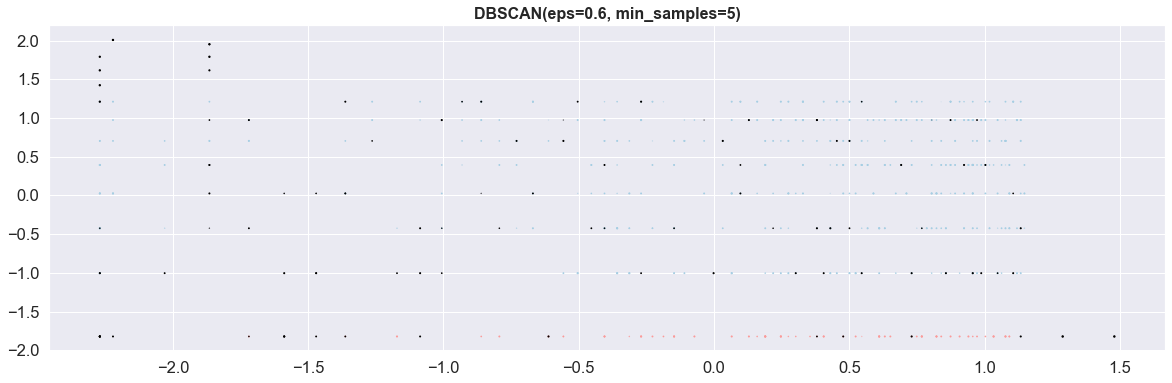

In [136]:

plt.figure(figsize=[20,6])
plt.title("DBSCAN(eps=0.6, min_samples=5)", fontsize = 16, fontweight = 'bold')
plt.scatter(df1.loc[df1.label_db1 != -1].x1, 
            df1.loc[df1.label_db1 != -1].x2,
            df1.loc[df1.label_db1 != -1].x3,
            c = df1.loc[df1.label_db1 != -1].label_db1,
            cmap = plt.cm.Paired)
plt.scatter(df1.loc[df1.label_db1 == -1].x1, 
            df1.loc[df1.label_db1 == -1].x2,
            df1.loc[df1.label_db1 == -1].x3,
           c = 'black')

plt.show()

Qtd. clusters definidos:  6 



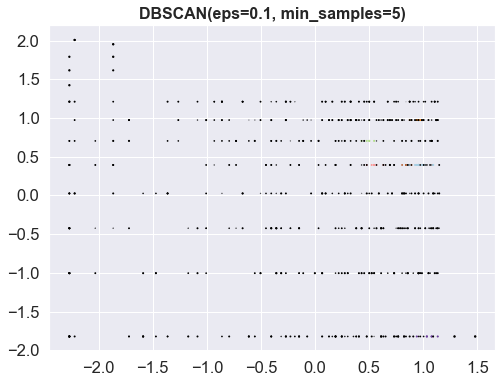

In [141]:
plt.figure(figsize=[8,6])
db1 = DBSCAN(eps=0.1,  min_samples=5).fit(X1)
print("Qtd. clusters definidos: ",  np.unique(db1.labels_).size-1, '\n')
df1 = pd.DataFrame(np.c_[X1, db1.labels_], columns = ['x1', 'x2', 'x3', 'label_db1'])
plt.title("DBSCAN(eps=0.1, min_samples=5)", fontsize = 16, fontweight = 'bold')
plt.scatter(df1.loc[df1.label_db1 != -1].x1, 
            df1.loc[df1.label_db1 != -1].x2,
            df1.loc[df1.label_db1 != -1].x3,
            c = df1.loc[df1.label_db1 != -1].label_db1,
            cmap = plt.cm.Paired)
plt.scatter(df1.loc[df1.label_db1 == -1].x1, 
            df1.loc[df1.label_db1 == -1].x2,
            df1.loc[df1.label_db1 == -1].x3,
           c = 'black')
plt.show()